# Nightwish plays

I've recently fallen in love all over again with one of my favourite bands from teenage years, Finnish symphonic metalheads Nightwish. It's not just that they compose beautiful music, they do some kind of science communication through it. But I'll keep the musical essay for another time and place. Let's talk about this (very simple) code!

I got the feeling there was some kind of exponential trend in my listening to Nightwish. Was this feeling supported by data? I like to collect as much information as I can about what I'm listening to, for example using [Last.fm](https://www.last.fm/user/ainomiadue). And I like coding – and I'm currently learning the basics of Python and pandas. So I took this chance to practice, using some real-life data on something I love.

Am I really listening that much to one single band? Follow me to find out.

In [1]:
import pandas as pd
import datetime as dt
import time as tm
import matplotlib.pyplot as plt

### Last.fm data

As I just wanted to make a quick check with no big effort in data retrieval, I simply copied some numbers manually from Last.fm. Maybe someday soon I would like to do this in a [smarter](https://github.com/encukou/lastscrape-gui) way, that would allow for re-use of the code? [Maybe](https://github.com/juandes/spotify-audio-features-data-experiment) [also](https://github.com/VincyHu/MusicForYou) [using](https://github.com/kartikd1/Spotify) data from Spotify, which is my music player at the moment? We'll see.

I wrote this code on 8/9/2020, and my Last.fm profile I took the data from was born on 9/1/2013. So these are the two dates in the code. Those pandas Series contain my number of plays as they are shown on Last.fm, so on the previous 7, 30, 90,... days before this code's frozen `today` = 8/9/2020. Then, I join the Series in one DataFrame, using strings with these time periods as indices.

My main motivation for writing this code, actually, was seeing that Nightwish were my most-played artist over each one of these timespans. So I also added data about my second-best artist for each period. There seems to be an increasing gap between my Nightwish plays and other artists' plays. That's huge, considering that my listenings usually range over many different artists during one single day or one week. I have not yet used any further the second artists' data for the moment.

In [28]:
today = dt.date(2020, 9, 8)
start = dt.date(2013, 1, 9)

last_7 = pd.Series({'Nightwish plays': 137,
                        'Second-best': 'Evanescence',
                        'plays': 28})
last_30 = pd.Series({'Nightwish plays': 219,
                        'Second-best': 'Taylor Swift',
                        'plays': 100})
last_90 = pd.Series({'Nightwish plays': 469,
                        'Second-best': 'Evanescence',
                        'plays': 200})
last_180 = pd.Series({'Nightwish plays': 572,
                        'Second-best': 'Infected Mushroom',
                        'plays': 406})
last_365 = pd.Series({'Nightwish plays': 633,
                        'Second-best': 'Masashi Hamauzu',
                        'plays': 452})
all_time = pd.Series({'Nightwish plays': 706,
                        'Second-best': 'Queen',
                        'plays': 510})

df = pd.DataFrame([last_7, last_30, last_90, last_180, last_365, all_time],
                  index = ['Last 7 days', 'Last 30 days', 'Last 90 days',
                           'Last 180 days', 'Last 365 days', 'All time'])
df

,Nightwish plays,Second-best,plays
Last 7 days,137,Evanescence,28
Last 30 days,219,Taylor Swift,100
Last 90 days,469,Evanescence,200
Last 180 days,572,Infected Mushroom,406
Last 365 days,633,Masashi Hamauzu,452
All time,706,Queen,510


### Pre-processing data

I had this idea of a plot showing my Nightwish plays vs. time, for which I was expecting an exponential growth. In order to have that, I need to do some easy calculations on the copy-pasted Last.fm data.

First, let's convert the string indices to real `datetime` dates. You just need to subtract an appropriate `timedelta` from `today`. And of course, the date corresponding to "All time" is the starting date of my Last.fm profile.

I have set all these as indices of a fresh new DataFrame.

In [29]:
df2 = pd.DataFrame(index = [today - dt.timedelta(days = 7),
                            today - dt.timedelta(days = 30),
                            today - dt.timedelta(days = 90),
                            today - dt.timedelta(days = 180),
                            today - dt.timedelta(days = 365),
                            start])
df2

""
2020-09-01
2020-08-09
2020-06-10
2020-03-12
2019-09-09
2013-01-09


The number of plays also needs to be adjusted, of course. For example, on the row for the day corresponding to 7 days before `today` (1/9/2020) I don't want to see how many times I listened to them in the 7 days following that day – but instead, how many times I *had* listened to them up to 1/9/2020. This means that the variable I'm interested in is the *cumulative* number of plays.

So at first I store the all-time number of plays in a new variable `all_time_nw`, and then I subtract from that total each row of the original DataFrame. To access its values easily, I convert it (or better said, its column I'm interested in called 'Nightwish plays') to a list.

Finally, I add the cumulative number of plays up to `today`, that is exactly `all_time_nw`, without subtracting anything. "Add" means that I `append` a new row. And then, I sort the DataFrame by index, so that it's in chronological order.

In [30]:
all_time_nw = df['Nightwish plays']['All time']
df2['Total Nightwish plays'] = all_time_nw - df['Nightwish plays'].tolist()
df2 = df2.append(pd.Series({'Total Nightwish plays': all_time_nw}, name=today))
df2 = df2.sort_index()
df2

,Total Nightwish plays
2013-01-09,0
2019-09-09,73
2020-03-12,134
2020-06-10,237
2020-08-09,487
2020-09-01,569
2020-09-08,706


### Plot

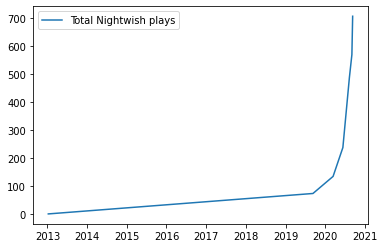

In [26]:
df2.plot(y='Total Nightwish plays', use_index=True)
#df2.iloc[1:].reset_index().plot.scatter(x='index', y='Total Nightwish plays')
plt.show()

There it is! This is just the exponential trend I had predicted.

That zero in 2013 is there because I used my current Last.fm profile only. I had two former profiles, covering my teenage years when I was also listening a lot to Nightwish. I should definitely add those data to this analysis.

Am I listening more to Nightwish now than then? How will this trend go on? Will I #flattenthecurve sooner or later? Will I be able to go to their concert, or will concerts never ever be a thing again? Stay tuned to find out. Maybe.

But most importantly: enjoy some good [Music](https://youtu.be/rwz7-h9LCDU)!